<a href="https://colab.research.google.com/github/Gnommer/Automated-Ticketing-System/blob/master/colab_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cloning Github Repo

In [0]:
import os
import shutil
# from getpass import getpass

# username = input('Github username: ')
# password = getpass('Github password: ')
# os.environ['GITHUB_AUTH'] = username + ':' + password

# !git clone https://$GITHUB_AUTH@github.com/Gnommer/Automated-Ticketing-System
os.chdir("Automated-Ticketing-System")

#### Importing Dependencies

In [0]:
import pandas as pd
from Pipelines import NLP_Pipeline

import matplotlib.pyplot as plt

In [0]:
# Using a custom pipeline to perform the steps
pipeline1 = NLP_Pipeline(file_path="Dataset/Synthetic_Dataset.xlsx")

#### Loading Dataset

In [0]:
df = pipeline1.read_dataset()

In [5]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


#### Exploratory Data Analysis

##### Shape of the Data Frame

In [6]:
df.shape

(8500, 4)

##### Missing values

In [7]:
pd.DataFrame(df.isna().sum()).T

,Short description,Description,Caller,Assignment group
0,8,1,0,0


there are 8 records with short description which is missing
and 1 record with the description missing

In [8]:
df[df.isna()["Short description"]]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


In [9]:
df[df.isna()["Description"]]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


so we will be removing these records for now. the system should prevent the cases from accepting tickets without descriptions. or we have to generate additional features to supplement this problem

In [0]:
df = df.dropna()

#### Distributions of the labels

There are more Group 0 tickets than others.

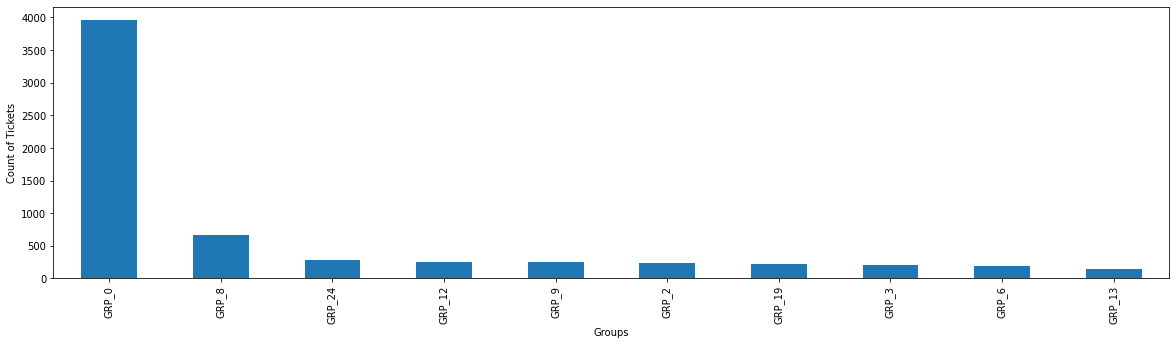

In [26]:
plt.figure(figsize=(20, 5))
df["Assignment group"].value_counts()[:10].plot(kind='bar')
plt.yscale('linear')
plt.ylabel("Count of Tickets")
plt.xlabel("Groups")
plt.show()

There are clear bins formed for the complaints when the issues are explored in a log scale. Group 0 is the highest

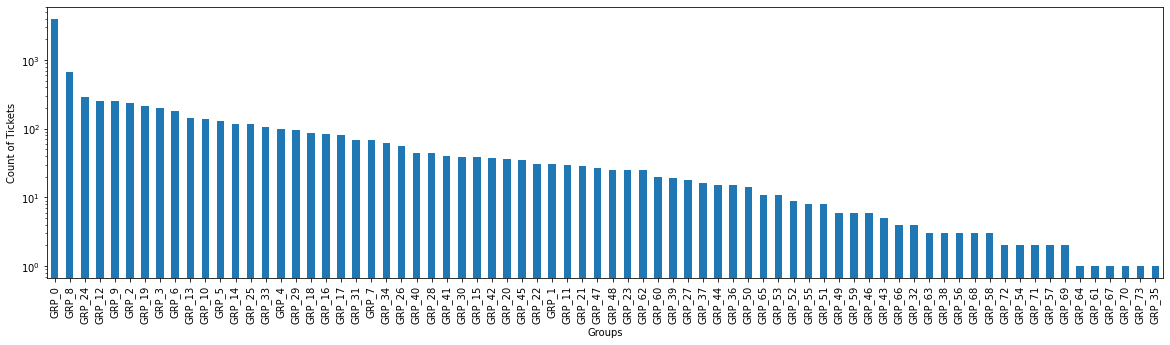

In [27]:
plt.figure(figsize=(20, 5))
df["Assignment group"].value_counts().plot(kind='bar')
plt.yscale('log')
plt.ylabel("Count of Tickets")
plt.xlabel("Groups")
plt.show()

#### The Data 

#### Presence of different languages

As we can see below there are tickets which are not completely in english. this ticket is in German. so we need to write a strategy to find the languages of the tickets based on the description and short description.

In [13]:
df[df.index == 255]

,Short description,Description,Caller,Assignment group
255,probleme mit laufwerk z: \laeusvjo fvaihgpx,probleme mit laufwerk z: \laeusvjo fvaihgpx,laeusvjo fvaihgpx,GRP_24


In [0]:
from Pipelines.preprocessing import detect_language

In [18]:
detected = [detect_language(text) for text in df["Description"].values]
df["lang_code_description"] = [i[0] for i in detected]
df["lang_code_exp_description"] = [i[1] for i in detected]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


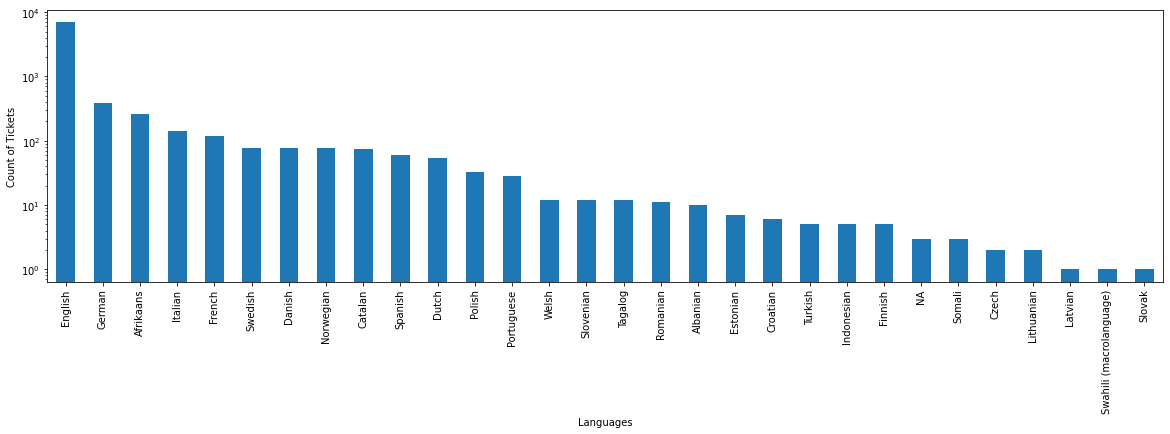

In [28]:
plt.figure(figsize=(20, 5))
df["lang_code_exp_description"].value_counts().plot(kind="bar")
plt.yscale('log')
plt.ylabel("Count of Tickets")
plt.xlabel("Languages")
plt.show()

In [29]:
df["Description"]

0       -verified user details.(employee# & manager na...
1       \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2       \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3                           unable to access hr_tool page
4                                            skype error 
                              ...                        
8495    \r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...
8496                             telephony_software issue
8497    vip2: windows password reset for tifpdchb pedx...
8498    i am unable to access the machine utilities to...
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: Description, Length: 8491, dtype: object